In [86]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
digit_data=load_digits()
print(digit_data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [88]:
dir(digit_data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

# Target Names In Digit Dataset

In [89]:
digit_data.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# All THE HANDWRITTEN TARGET IMAGES

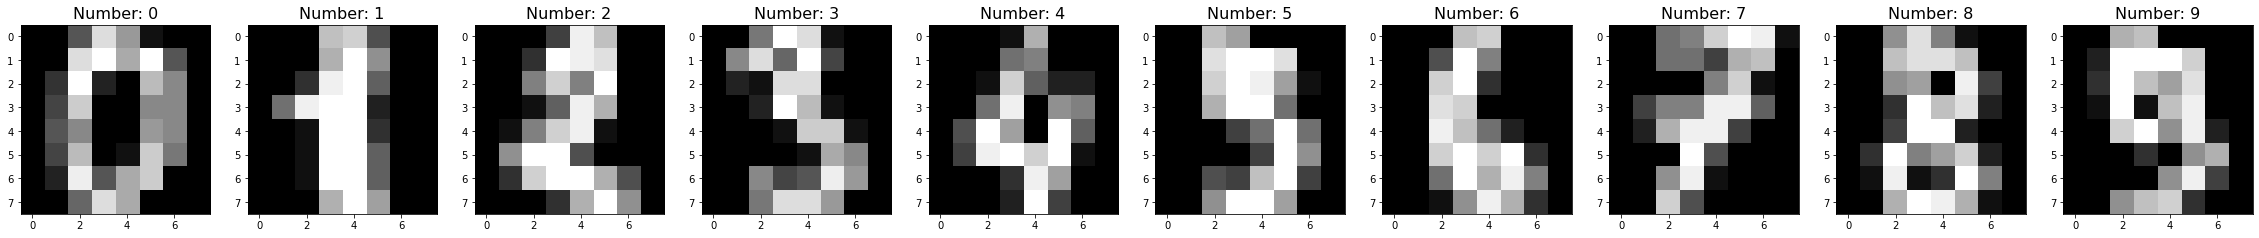

In [90]:
fig,ax = plt.subplots(1,10,figsize = (40,40))
ax = ax.ravel()
for i in range(10):
  image = digit_data.images[i]
  ax[i].imshow(image,cmap = 'gray')
  ax[i].set_title(f"Number: {digit_data.target[i]}",fontdict={"size": 16})
  
plt.show()

In [91]:
X=digit_data.data
X.shape

(1797, 64)

In [92]:
Y=digit_data.target
Y.shape

(1797,)

# Standardizing Data Of Features Of Images

In [93]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,shuffle=True)

In [95]:
X_train.shape,y_train.shape

((1437, 64), (1437,))

In [96]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [97]:
predict=model.predict(X_test)

# Accuracy Of Model And Visulization Of Confusion Matrix

In [98]:
from sklearn.metrics import accuracy_score,confusion_matrix
ac=accuracy_score(y_test,predict)
print("Accuracy is: ",ac)

Accuracy is:  0.975


Text(0.5, 1.0, 'Accuracy Score: 0.975')

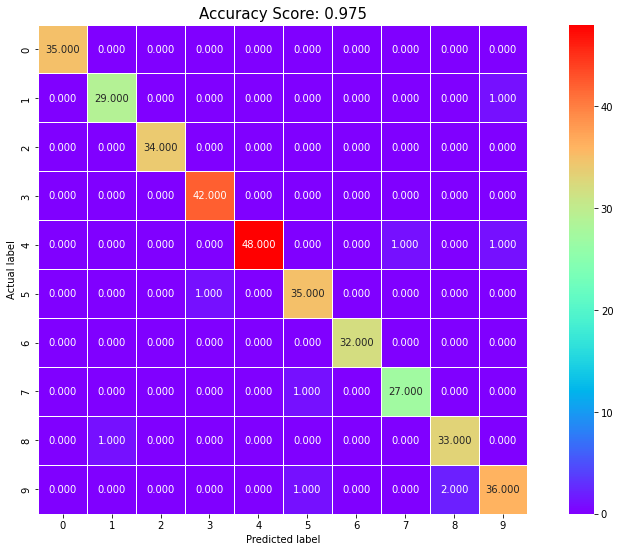

In [99]:
plt.figure(figsize=(15,9))
sns.heatmap(confusion_matrix(y_test,predict),annot=True,fmt=".3f", linewidths=.5, square = True, cmap = 'rainbow')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(ac)
plt.title(all_sample_title, size = 15)

# Function To Just Compare Predicted Vs True Value Visually

In [100]:
def getprediction(data,label):
    predict = model.predict(data)
    ac=accuracy_score(label,predict)
    fig,ax = plt.subplots(1,len(predict),figsize = (40,40))
    mis_predict={}
    for j in range(len(predict)):
        cnt = 0
        for i in range(0,10):
            if (predict[j] == digit_data.target[i]):
                plt.gray()
                ax[j].matshow(digit_data.images[cnt])
                ax[j].set_title("Prediciton: {},Orignal: {}".format(
                    digit_data.target[cnt],label[j]), fontdict={"size": 16})
                if(label[j]!=digit_data.target[cnt]):
                    mis_predict.update({f"Orignal :{digit_data.target[cnt]}":f"Predicted: {label[j]}"})
                break
            cnt+=1
    print("Accuracy of this testing set is: {} %".format(ac*100))
    print("Incorrect prediction are: ")
    for key in mis_predict:
        print(key, mis_predict[key])

Accuracy of this testing set is: 90.0 %
Incorrect prediction are: 
Orignal :8 Predicted: 9


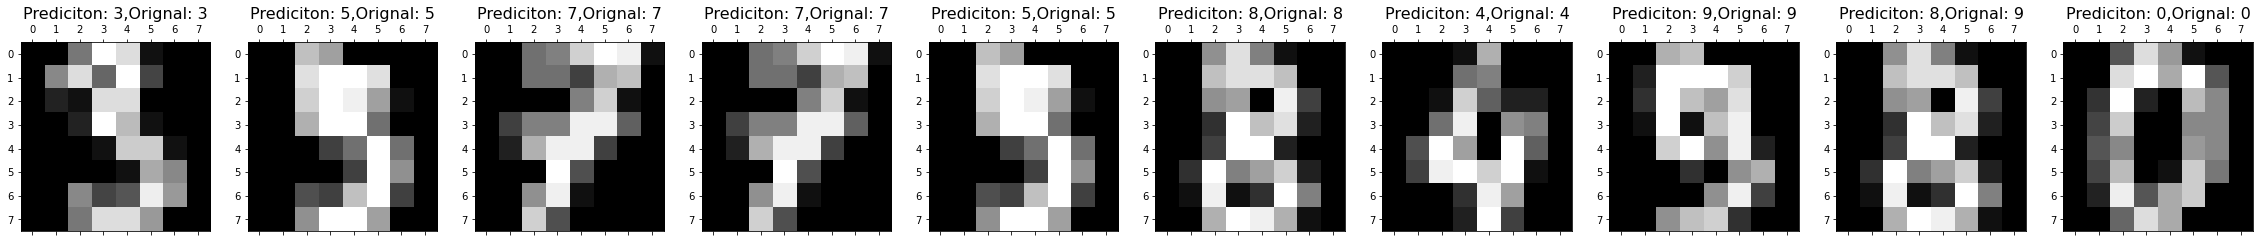

In [101]:
getprediction(X_test[:10,:],y_test[:10])

# Saving Model

In [102]:
import joblib as jb
jb.dump(model,"digit_classifier_model")

['digit_classifier_model']